In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X = pd.read_csv('final train features.csv')
y = pd.read_csv('final train target.csv')
X_test = pd.read_csv('final test features.csv')

df_test = pd.read_csv('testing Dataset.csv')


In [3]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective= 'multi:softmax')

param_dict_xgb = {
    'eta': np.arange(0.1, 1, 0.1),
    'gamma': np.arange(0, 100, 1),
    'max_depth': np.arange(1, 20, 1),
    'subsample': np.arange(0.05, 1, 0.05),
    'colsample_bytree': np.arange(0.1, 1, 0.1)
}

In [4]:
# metrics used
from sklearn.metrics import classification_report

def wt_f1(y_true, y_pred):
    score = classification_report(y_true, y_pred, output_dict= True)['weighted avg']['f1-score']
    return score


In [5]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV


# model validation function
param_dict= param_dict_xgb
features= X
target= y
metric = make_scorer(wt_f1)
rscv = RandomizedSearchCV(xgb_clf, param_distributions= param_dict, n_iter= 25, scoring= metric, cv= 5, random_state= 40,\
                              n_jobs= -1)
    
rscv.fit(features, target)


predictions = rscv.predict(X_test)

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aman\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
rscv.best_score_

0.9879098459258719

In [7]:
pred = pd.Series(predictions)
pred.unique()

array([0, 1, 2], dtype=int64)

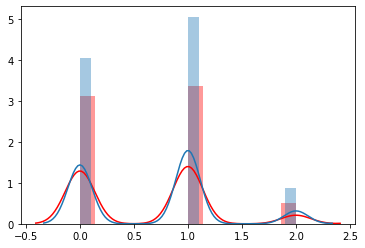

In [8]:
sns.distplot(pred, color= 'red', label= 'Predicted class')
sns.distplot(y, label= 'Train class')

In [9]:
pred.replace({
    0: 'STAR',
    1: 'GALAXY',
    2: 'QSO'
}, inplace= True)

pred.value_counts()

GALAXY    1209
STAR      1114
QSO        181
dtype: int64

In [11]:
#pred.to_csv('Submission.csv', header=  ['class'], index_label= 'Index')